In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### 读取数据

In [16]:
df = pd.read_csv('processed.csv')
df_test = pd.read_csv('processed_test.csv')
df.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285285 entries, 0 to 285284
Columns: 356 entries, OPEN_ORG_NUM to L6_CHANNEL_AUTO_DOUTTA_AVGCNT
dtypes: float64(260), int64(96)
memory usage: 774.9 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189766 entries, 0 to 189765
Columns: 355 entries, OPEN_ORG_NUM to L6_CHANNEL_AUTO_DOUTTA_AVGCNT
dtypes: float64(259), int64(96)
memory usage: 514.0 MB


In [17]:
# # 将取值个数大于100的属性列视为连续值进行max-min归一化（暂定）
# # 主要是为了避免MLP训练过程数值不稳定，并不影响下面相关系数结果
# for col in df.columns:
#     if len(df[col].value_counts()) > 100:
#         df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())
#         df_test[col] = (df_test[col] - df_test[col].min()) / (df_test[col].max() - df_test[col].min())

In [19]:
# 归一化
for i in df.columns:
    if(i == 'bad_good'):
        continue
    df[i] = df[i].astype(float)
    df_test[i] = df_test[i].astype(float)
    df[i] = (df[i]-df[i].min())/(df[i].max()-df[i].min())
    df_test[i] = (df_test[i]-df_test[i].min())/(df_test[i].max()-df_test[i].min())

### 查看相关性

In [20]:
target_corr = []
for col in df.columns:
    if col != 'bad_good':
        target_corr.append((col, abs(df['bad_good'].corr(df[col]))))
target_corr.sort(key=lambda item: item[1])
cols = [item[0] for item in target_corr]
corrs = [item[1] for item in target_corr]
nums = [np.sum(np.array(corrs) > 0.001 * times) for times in range(1, 11)]

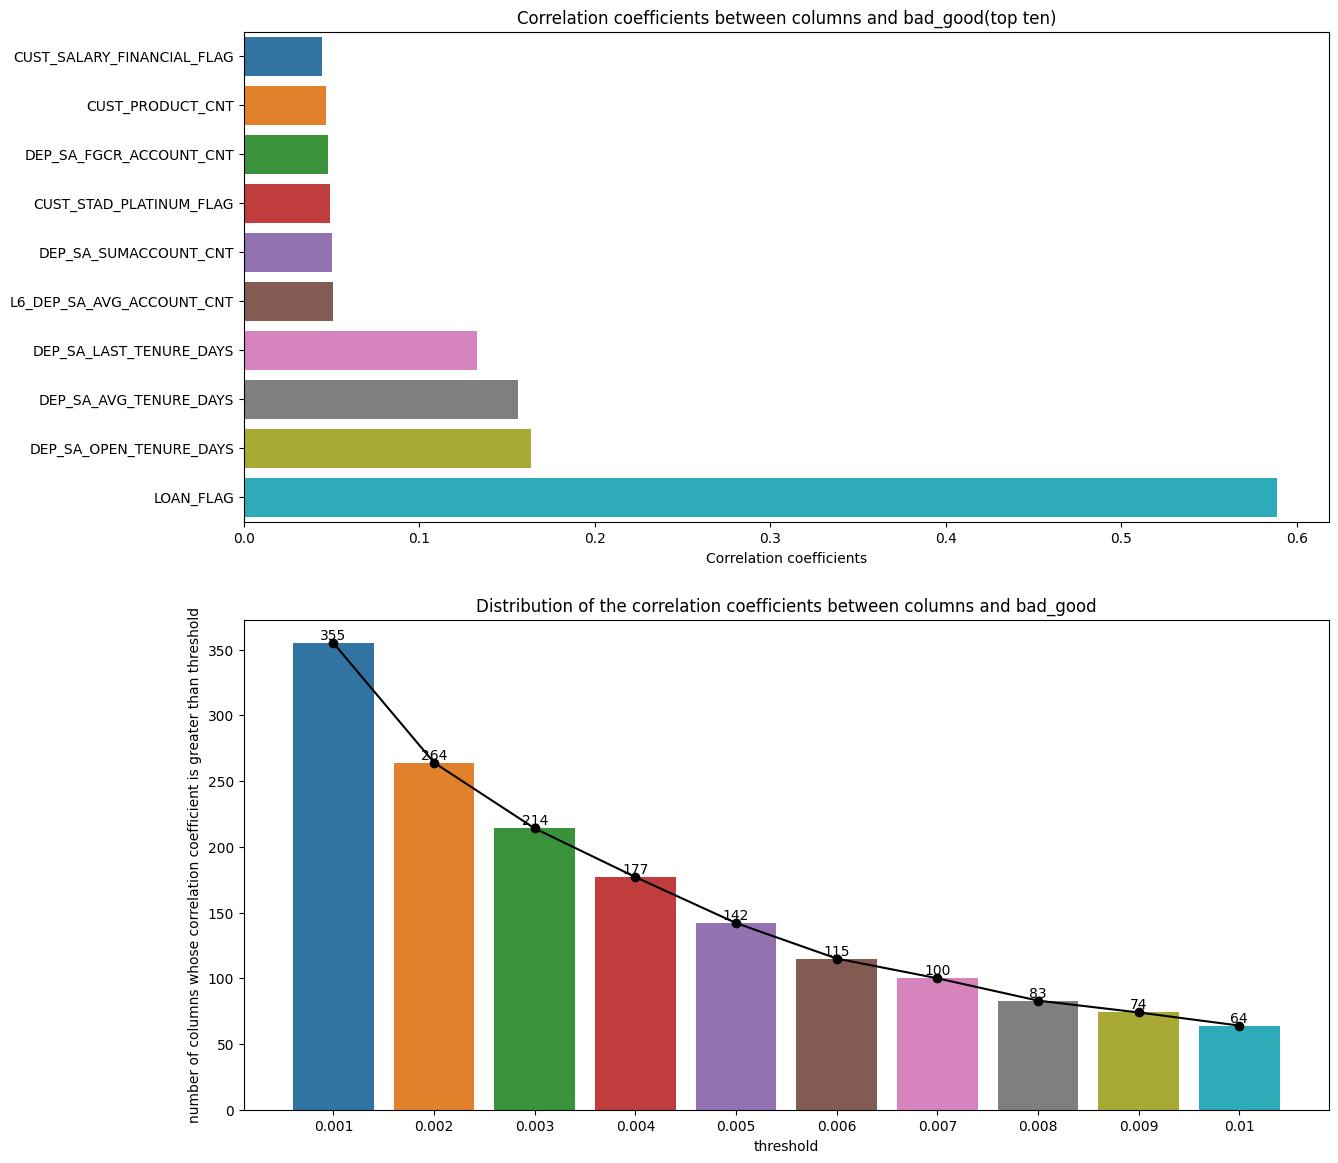

In [21]:
plt.figure(figsize = (14, 14))
plt.subplot(211)
sns.barplot(x = corrs[-10:], y = cols[-10:], orient='h')
plt.title('Correlation coefficients between columns and bad_good(top ten)')
plt.xlabel('Correlation coefficients')

plt.subplot(212)
threshold = [str(round(0.001 * times, 3)) for times in range(1, 11)]
sns.barplot(x = threshold, y = nums)
plt.plot(threshold, nums, marker='o', color='black')
for i in range(len(threshold)):
    plt.text(threshold[i], nums[i] + 0.5, str(nums[i]), ha='center', va='bottom')
plt.title('Distribution of the correlation coefficients between columns and bad_good')
plt.xlabel('threshold')
plt.ylabel('number of columns whose correlation coefficient is greater than threshold')
plt.show()

### 划分训练集和验证集

In [24]:
import pickle
# 暂时选取前100列
data = df[cols[-100: ] + ['bad_good']].copy()
test_data = df_test[cols[-100: ]].copy()
f = open("final_data.pkl", 'wb')
f2 = open("final_test_data.pkl", 'wb')
pickle.dump(data, f)
pickle.dump(test_data, f2)